In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/apart/price_data.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/apart/marry.csv')

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5341031 entries, 0 to 5341030
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   Area code             int64  
 2   Gu                    object 
 3   Dong                  object 
 4   Lot number            object 
 5   Trading day           object 
 6   Apartment             object 
 7   Exclusive area        float64
 8   Floor                 object 
 9   Year of construction  int64  
 10  Transaction amount    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 448.2+ MB


In [5]:
df1.drop('Unnamed: 0',inplace=True,axis=1)

In [6]:
df1 = df1.astype({'Area code':'int',
                          'Dong':'category',
                          'Trading day':'datetime64',
                          'Apartment':'category',
                          'Exclusive area':'float',
                          'Floor':'category',
                          'Year of construction':'int',
                          'Transaction amount':'int'})

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5341031 entries, 0 to 5341030
Data columns (total 10 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Area code             int64         
 1   Gu                    object        
 2   Dong                  category      
 3   Lot number            object        
 4   Trading day           datetime64[ns]
 5   Apartment             category      
 6   Exclusive area        float64       
 7   Floor                 category      
 8   Year of construction  int64         
 9   Transaction amount    int64         
dtypes: category(3), datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 317.5+ MB


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      1800 non-null   int64  
 1   month     1800 non-null   int64  
 2   Gu        1800 non-null   object 
 3   marriage  1800 non-null   int64  
 4   avg       1800 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 70.4+ KB


In [9]:
df1['Trading day'].dt.year

0          2020
1          2020
2          2020
3          2020
4          2020
           ... 
5341026    2021
5341027    2021
5341028    2021
5341029    2021
5341030    2021
Name: Trading day, Length: 5341031, dtype: int64

In [10]:
df1['year']=df1['Trading day'].dt.year

In [11]:
df1['month']=df1['Trading day'].dt.month

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5341031 entries, 0 to 5341030
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Area code             int64         
 1   Gu                    object        
 2   Dong                  category      
 3   Lot number            object        
 4   Trading day           datetime64[ns]
 5   Apartment             category      
 6   Exclusive area        float64       
 7   Floor                 category      
 8   Year of construction  int64         
 9   Transaction amount    int64         
 10  year                  int64         
 11  month                 int64         
dtypes: category(3), datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 399.0+ MB


In [13]:
df1=df1[(df1['Area code']<=11740)&(df1['Area code']>=11110)]

In [14]:
df=pd.merge(df1,df2,on=['year','month','Gu'],how='left')

In [15]:
df.dropna(inplace=True)

In [16]:
df.drop(['year','month','marriage'],axis=1,inplace=True)

In [17]:
new_df=df[['Trading day','Area code','Gu','Dong','Lot number','Apartment','Exclusive area','Floor','Year of construction','avg','Transaction amount']]

In [20]:
new_df.to_csv('/content/drive/MyDrive/Colab Notebooks/apart/newData.csv')

In [21]:
new_df.head()

,Trading day,Area code,Gu,Dong,Lot number,Apartment,Exclusive area,Floor,Year of construction,avg,Transaction amount
0,2018-01-13,11110,종로구,내수동,71,경희궁의아침2단지,140.78,15,2004,2.16129,130000
1,2018-01-19,11110,종로구,내수동,95,경희궁 파크팰리스,103.77,5,2003,2.16129,96000
2,2018-01-23,11110,종로구,내수동,72,경희궁의아침3단지,123.13,10,2004,2.16129,118000
3,2018-01-30,11110,종로구,내수동,167,세종로대우,66.96,13,1994,2.16129,54500
4,2018-01-31,11110,종로구,내수동,167,세종로대우,76.66,11,1994,2.16129,64000


In [58]:
new_df[(new_df['Area code']==11110)]['Dong'].value_counts()

창신동        1027
숭인동         820
무악동         775
평창동         325
사직동         269
           ... 
용산동2가         0
용산동           0
용봉동           0
용문면 마룡리       0
가경동           0
Name: Dong, Length: 3161, dtype: int64

In [59]:
sample = new_df[(new_df['Area code']==11110) & (new_df['Dong']=='창신동')]

In [60]:
len(sample)

1027

In [61]:
sample=sample.groupby('Trading day').mean()

In [62]:
sample = sample[['Transaction amount']]

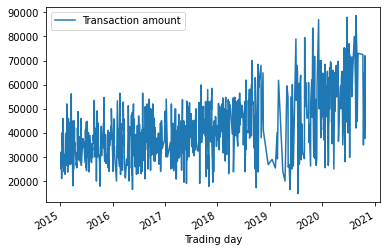

In [63]:
sample.plot()

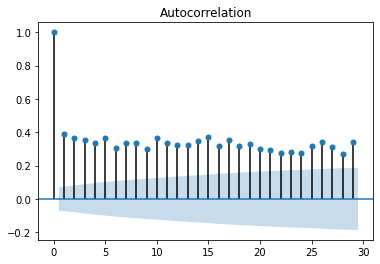

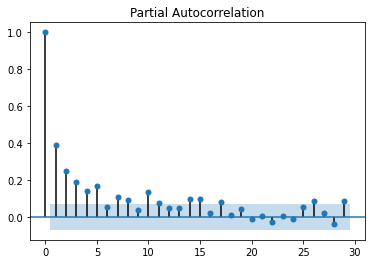

In [64]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(sample)
plot_pacf(sample)
plt.show()

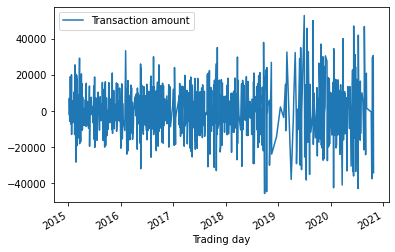

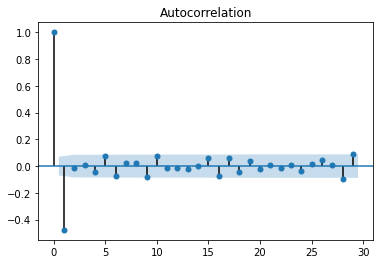

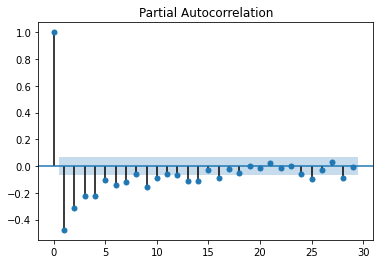

In [65]:
diff_1=sample.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [43]:
sample.dropna(inplace=True)

In [66]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import itertools

p=range(0,3)
d=range(1,2)
q=range(0,3)

pdq=list(itertools.product(p,d,q))

aic=[]
for i in pdq:
    model = ARIMA(sample,order=i)
    model_fit=model.fit()
    aic.append(round(model_fit.aic,2))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

In [67]:
pd.DataFrame({'(p,d,q)': pdq, 'AIC': aic[:9]})

,"(p,d,q)",AIC
0,"(0, 1, 0)",17025.03
1,"(0, 1, 1)",16553.58
2,"(0, 1, 2)",16553.86
3,"(1, 1, 0)",16826.10
4,"(1, 1, 1)",16553.83
5,"(1, 1, 2)",16554.20
6,"(2, 1, 0)",16746.81
7,"(2, 1, 1)",16555.78
8,"(2, 1, 2)",16557.78


In [69]:
model = ARIMA(sample, order=(0,1,1))
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

                              ARIMA Model Results                               
Dep. Variable:     D.Transaction amount   No. Observations:                  774
Model:                   ARIMA(0, 1, 1)   Log Likelihood               -8273.788
Method:                         css-mle   S.D. of innovations          10602.528
Date:                  Thu, 12 Aug 2021   AIC                          16553.576
Time:                          05:45:21   BIC                          16567.530
Sample:                               1   HQIC                         16558.945
                                                                                
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         38.3302     11.374      3.370      0.001      16.037      60.623
ma.L1.D.Transaction amount    -0.9716      0.008   -123.741      0.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


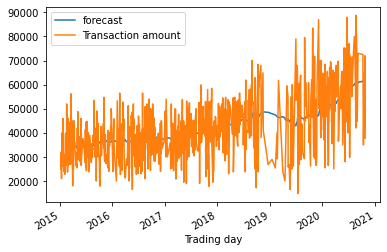

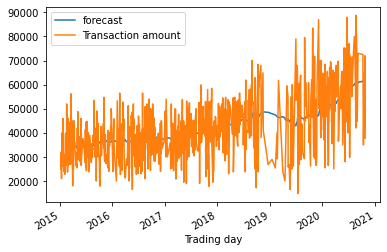

In [70]:
model_fit.plot_predict()